### We study the Michaelis Menten Enzyme kinetics system with 4 species as defined by:

$$
\begin{split}
S + E &\rightleftharpoons^{k_f}_{k_b} C \hspace{20pt} \text{Binding and unbinding of substrate S and enzyme E}\\
C &\rightarrow^{k_d} E + X \hspace{20pt} \text{Production of the product X by the complex C, \textit{typically fast}} \\ 
X &\rightarrow^{k_{2X}} \emptyset
\end{split}
$$

In [12]:
push!(LOAD_PATH, "../src/Achedmy/")
using Achedmy
using Pkg
using PyPlot
using Catalyst
using LinearAlgebra
using DifferentialEquations
using LaTeXStrings
using Serialization

In [2]:
enzyme_system = @reaction_network begin
    @species S(t) = 1. E(t) = 0.9 C(t) = 0.1 X(t) = 0.1
    @parameters k_f = 1. k_b = 0.1 k_d = 1. k_2X = 2. k_2S = .001
   (k_f,k_b), S + E <--> C
   (k_d), C --> E + X
   (k_2X), X --> 0
   (k_2S), S --> 0
end

Model ##ReactionSystem#235
States (4):
  S(t) [defaults to 1.0]
  E(t) [defaults to 0.9]
  C(t) [defaults to 0.1]
  X(t) [defaults to 0.1]
Parameters (5):
  k_f [defaults to 1.0]
  k_b [defaults to 0.1]
  k_d [defaults to 1.0]
  k_2X [defaults to 2.0]
⋮

In [ ]:
#Note: These parameters work well and can work for the paper, till k_f = 10 atleast, for a time range of 1!
enzyme_system = @reaction_network begin
    @species S(t) = 1.5 E(t) = 0.9 C(t) = 0.1 X(t) = 0.1 #IMP -- changed S to 1.5!
    @parameters k_f = 1. k_b = 0.1 k_d = 1. k_2X = 1. k_2S = 0. k_1S = 0.
   (k_f,k_b), S + E <--> C
   (k_d), C --> E + X
   (k_2X), X --> 0
   (k_2S,k_1S), S <--> 0
end

Model ##ReactionSystem#242
States (4):
  S(t) [defaults to 1.5]
  E(t) [defaults to 0.9]
  C(t) [defaults to 0.1]
  X(t) [defaults to 0.1]
Parameters (6):
  k_f [defaults to 1.0]
  k_b [defaults to 0.1]
  k_d [defaults to 1.0]
  k_2X [defaults to 1.0]
⋮

In [13]:
enzyme_system = @reaction_network begin
    @species S(t) = 1. E(t) = 0.9 C(t) = 0.1 X(t) = 0.1
    @parameters k_f = 1. k_b = 0.1 k_d = 1. k_2X = 1. k_2S = 1. k_1S = 1. #Idea -- keep the product quasi-fixed, start from k1/k2
   (k_f,k_b), S + E <--> C
   (k_d), C --> E + X
   (k_2X), X --> 0
   (k_2S,k_1S), S <--> 0
end

Model ##ReactionSystem#242
States (4):
  S(t) [defaults to 1.0]
  E(t) [defaults to 0.9]
  C(t) [defaults to 0.1]
  X(t) [defaults to 0.1]
Parameters (6):
  k_f [defaults to 1.0]
  k_b [defaults to 0.1]
  k_d [defaults to 1.0]
  k_2X [defaults to 1.0]
⋮

Graph(enzyme_system)

### Insert some Gillespie time traces with code here!

In [14]:
#Parameters simulation
tstart= 0.
tmax = 10.
atol = 1e-3 #decrease this value to increase the accuracy of the simulation (components smaller than this get rejected!)
rtol = 1e-2
k_max = 12 #Maximum order of the adaptive time stepper
dtmax = 0.1
dtini = 1e-5 #Minimum time step size!
Γ = 0.9
qmax = 5
qmin = 0.5

0.5

In [15]:
alpha_range = exp10.(range(-2, stop=1, length=10))
println(alpha_range)

[0.01, 0.021544346900318832, 0.046415888336127795, 0.1, 0.2154434690031884, 0.4641588833612779, 1.0, 2.154434690031884, 4.641588833612778, 10.0]


In [5]:
@unpack k_f = enzyme_system

SOL = []
VAR = []

for i in alpha_range

    enzyme_system.defaults[k_f] = i

    structure = Achedmy.ReactionStructure(enzyme_system)
    variables = Achedmy.ReactionVariables(structure,"cross")
    sol = Achedmy.solve_dynamics!(structure,variables,selfEnergy = "gSBR", tmax = tmax, tstart = tstart,
                     atol = atol, rtol = rtol , k_max = k_max, dtmax = dtmax, γ = Γ, qmax = qmax, qmin = qmin)

    push!(SOL,sol)
    push!(VAR,variables)

end

t: 0.0
t: 1.0e-6
t: 5.999999999999999e-6
t: 2.41037276182553e-5
t: 5.1493435537346114e-5
t: 0.00015367096847581401
t: 0.00047473051172433275
t: 0.0012635109899441174
t: 0.002571688656392304
t: 0.005454102439105086
t: 0.009854494406074922
t: 0.01746204050231695
t: 0.02799579612034367
t: 0.0436659997402134
t: 0.06401550373341941
t: 0.0912526744811541
t: 0.1250819328956169
t: 0.16713731063494322
t: 0.21770832169197782
t: 0.27735864621626494
t: 0.34732872205799026
t: 0.4267507200530159
t: 0.512646569707732
t: 0.6073527391505236
t: 0.7073527391505235
t: 0.8073527391505235
t: 0.9073527391505235
t: 1.0073527391505235
t: 1.1073527391505236
t: 1.2073527391505237
t: 1.3073527391505237
t: 1.4073527391505238
t: 1.507352739150524
t: 1.607352739150524
t: 1.707352739150524
t: 1.8073527391505242
t: 1.9073527391505243
t: 2.0073527391505244
t: 2.1073527391505245
t: 2.2073527391505245
t: 2.3073527391505246
t: 2.4073527391505247
t: 2.507352739150525
t: 2.607352739150525
t: 2.707352739150525
t: 2.807352739

In [16]:
## Reading data

SOL = open("../data/enzyme1/sol_gSBR.jls", "r") do f
    deserialize(f)
end

VAR = open("../data/enzyme1/var_gSBR.jls", "r") do f
    deserialize(f)
end

10-element Vector{Any}:
 ReactionVariables("cross", [1.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0; 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 1.0;;; 0.9999979910010091 -9.99999995e-9 9.999999950000002e-8 0.0; -8.999990955000045e-9 0.9999999900000001 1.0999999995e-6 0.0; 8.999990955000045e-9 9.99999995e-9 0.9999989000000005 0.0; 0.0 0.0 1.0e-6 0.9999980000009999;;; 0.9999929460238722 -5.999980193210904e-8 5.999960925740707e-7 0.0; -5.3999627756838825e-8 0.9999999400001981 6.59997859258657e-6 0.0; 5.3999627756838825e-8 5.999980193210904e-8 0.9999934000214074 0.0; 1.574995034503281e-13 1.7499973437500125e-13 5.999963250041531e-6 0.9999930000234999;;; … ;;; 5.195973846881773e-5 -0.008774430949571513 -0.008740839770380196 0.0; -3.0145910804710525e-6 0.9912255690504296 0.9912041858450958 0.0; 3.0145910804710525e-6 0.008774430949571513 0.00879581415490387 0.0; 1.7679088329826666e-5 0.008771880603676245 0.009112594974594412 5.497432954928865e-5;;; 4.7000448208133366e-5 -0.008774433264483234 -0.008743886091914779 0.0; -

In [ ]:
## Saving data

open("../data/enzyme1/sol_gSBR.jls", "w") do f
    serialize(f, SOL)
end
open("../data/enzyme1/var_gSBR.jls", "w") do f
    serialize(f, VAR)
end

10-element Vector{Any}:
 ReactionVariables("cross", [1.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0; 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 1.0;;; 0.9999979910010091 -9.99999995e-9 9.999999950000002e-8 0.0; -8.999990955000045e-9 0.9999999900000001 1.0999999995e-6 0.0; 8.999990955000045e-9 9.99999995e-9 0.9999989000000005 0.0; 0.0 0.0 1.0e-6 0.9999980000009999;;; 0.9999929460238722 -5.999980193210904e-8 5.999960925740707e-7 0.0; -5.3999627756838825e-8 0.9999999400001981 6.59997859258657e-6 0.0; 5.3999627756838825e-8 5.999980193210904e-8 0.9999934000214074 0.0; 1.574995034503281e-13 1.7499973437500125e-13 5.999963250041531e-6 0.9999930000234999;;; … ;;; 5.195973846881773e-5 -0.008774430949571513 -0.008740839770380196 0.0; -3.0145910804710525e-6 0.9912255690504296 0.9912041858450958 0.0; 3.0145910804710525e-6 0.008774430949571513 0.00879581415490387 0.0; 1.7679088329826666e-5 0.008771880603676245 0.009112594974594412 5.497432954928865e-5;;; 4.7000448208133366e-5 -0.008774433264483234 -0.008743886091914779 0.0; -

### Plot the means:

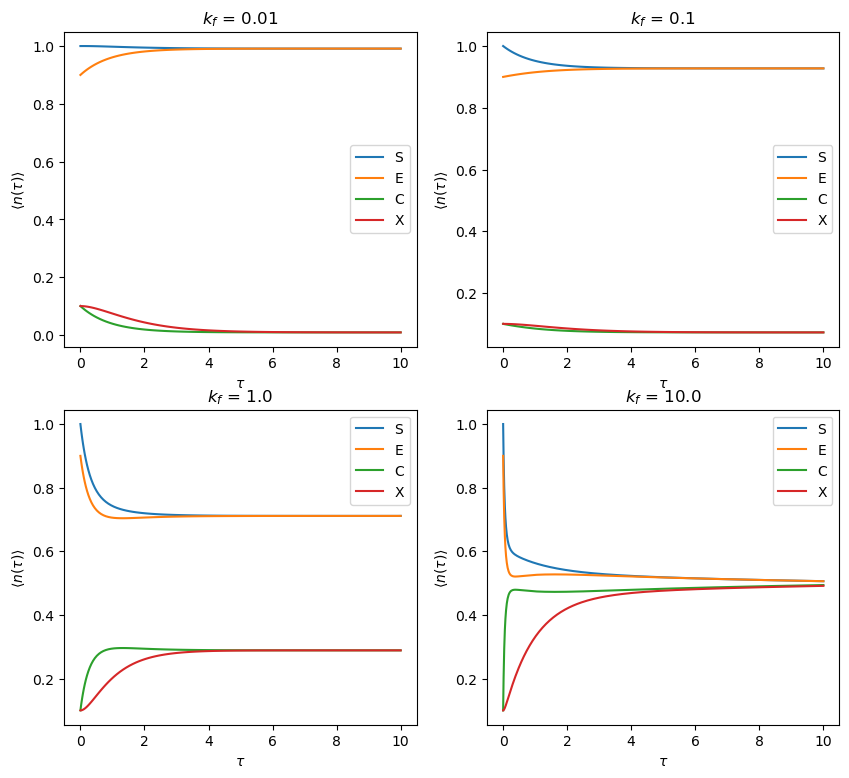

In [8]:
plot_indices = [1,4,7,10]

figure(figsize=(10,9))
for i in range(1,length(plot_indices))
    subplot(2,2,i)
    for j in range(1,length(species(enzyme_system)))
        plot(SOL[plot_indices[i]].t,VAR[plot_indices[i]].μ[j,:],label=alpha_range[plot_indices[i]])
        legend(["S","E","C","X"])
    end
    title(L"$k_f$ = " * string(alpha_range[plot_indices[i]]))
    #yscale("log")
    xlabel(L"$\tau$")
    ylabel(L"$\langle n(\tau)\rangle$")
end

gcf()

In [9]:
close("all")

### Plot the variances:

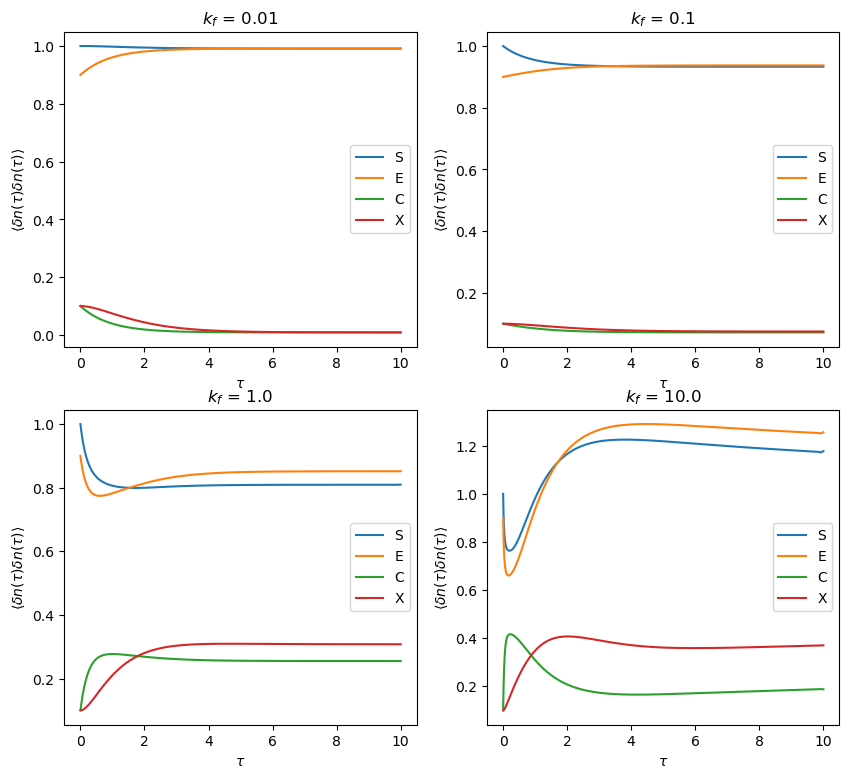

In [18]:
plot_indices = [1,4,7,10]
figure(figsize=(10,9))
for i in range(1,length(plot_indices))
    subplot(2,2,i)
    for j in range(1,length(species(enzyme_system)))
        plot(SOL[plot_indices[i]].t, diag(VAR[plot_indices[i]].N[j,j,:,:]), label=alpha_range[plot_indices[i]])
        legend(["S","E","C","X"])
    end
    title(L"$k_f$ = " * string(alpha_range[plot_indices[i]]))
    #yscale("log")
    xlabel(L"$\tau$")
    ylabel(L"$\langle \delta n(\tau) \delta n(\tau) \rangle$")
end

gcf()

In [13]:
## Running MAK:
@unpack k_f = enzyme_system

SOL_mak = []
VAR_mak = []

for i in alpha_range

    enzyme_system.defaults[k_f] = i
    
    # println(enzyme_system.defaults)
    structure = Achedmy.ReactionStructure(enzyme_system)
    variables = Achedmy.ReactionVariables(structure,"single")
    sol = Achedmy.solve_dynamics!(structure,variables,selfEnergy = "MAK", tmax = tmax, tstart = tstart,
    atol = atol, rtol = rtol , k_max = k_max, dtmax = dtmax, γ = Γ, qmax = qmax, qmin = qmin);

    push!(SOL_mak,sol)
    push!(VAR_mak,variables)

end


UndefVarError: UndefVarError: `enzyme_system` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [18]:
SOL_mak = open("../data/enzyme1/sol_mak.jls", "r") do f
    deserialize(f)
end

VAR_mak = open("../data/enzyme1/var_mak.jls", "r") do f
    deserialize(f)
end

10-element Vector{Any}:
 ReactionVariables("single", [1.0 0.999997991001009 … 4.5017660113027614e-5 4.109959730868287e-5; 1.0 0.99999999 … 0.9062859526383035 0.9054765707435374; 1.0 0.9999989 … 1.841045560336628e-5 1.6672087276002935e-5; 1.0 0.9999980000009999 … 4.962511799813141e-5 4.534656738558912e-5;;; 0.0 1.0 … 4.501775055364312e-5 4.109967987789834e-5; 0.0 1.0 … 0.906285961701163 0.9054765797983032; 0.0 1.0 … 1.841047585488975e-5 1.6672105615319142e-5; 0.0 1.0 … 4.962521724851629e-5 4.534665807885995e-5;;; 0.0 0.0 … 4.501718908201796e-5 4.1099167273341893e-5; 0.0 0.0 … 0.9062858496741611 0.9054764678713499; 0.0 0.0 … 1.8410225526482446e-5 1.6671878923642183e-5; 0.0 0.0 … 4.9624603832206036e-5 4.5346097549733356e-5;;; … ;;; 0.0 0.0 … 0.8969675049754111 0.8189387446906781; 0.0 0.0 … 0.9989269509512371 0.998034838880387; 0.0 0.0 … 0.8883958333333336 0.8045539848262379; 0.0 0.0 … 0.897916666666667 0.8205378431876426;;; 0.0 0.0 … 1.0 0.9075312077875292; 0.0 0.0 … 1.0 0.999043365196894

In [20]:
open("../data/enzyme1/sol_mak.jls", "w") do f
    serialize(f, SOL_mak)
end

open("../data/enzyme1/var_mak.jls", "w") do f
    serialize(f, VAR_mak)
end

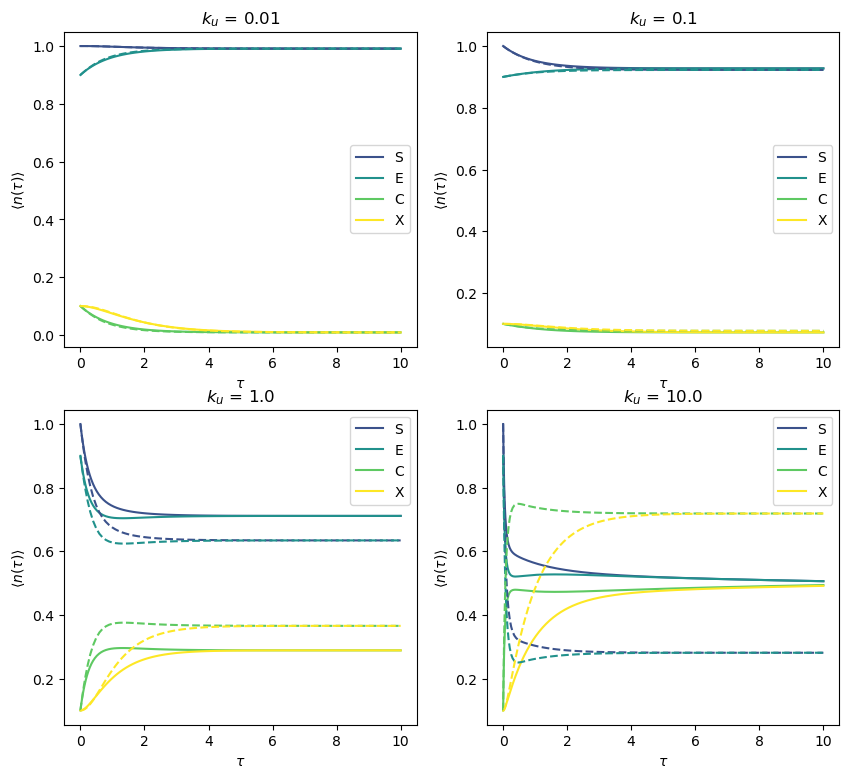

In [37]:
plot_indices = [1,4,7,10]

figure(figsize=(10,9))
for i in range(1,length(plot_indices))
    subplot(2,2,i)
    for j in range(1,length(species(enzyme_system)))
        plot(SOL[plot_indices[i]].t, VAR[plot_indices[i]].μ[j, :], label=alpha_range[plot_indices[i]], color=plt.cm.viridis(j / length(species(enzyme_system))))
        legend(["S","E","C","X"])
        #plot(SOL_mak[plot_indices[i]].t,VAR_mak[plot_indices[i]].μ[j,:],label=alpha_range[plot_indices[i]],"--",color=plt.cm.plasma(j / length(species(enzyme_system))))
    end
    for j in range(1,length(species(enzyme_system)))
        plot(SOL_mak[plot_indices[i]].t, VAR_mak[plot_indices[i]].μ[j, :], label=alpha_range[plot_indices[i]], "--", color=plt.cm.viridis(j / length(species(enzyme_system))))
    end
    title(L"$k_u$ = " * string(alpha_range[plot_indices[i]]))
    #yscale("log")
    xlabel(L"$\tau$")
    ylabel(L"$\langle n(\tau)\rangle$")
end

gcf()

### Plotting the cross variances $\langle \delta n_i(\tau)\delta n_j(\tau) \rangle$:

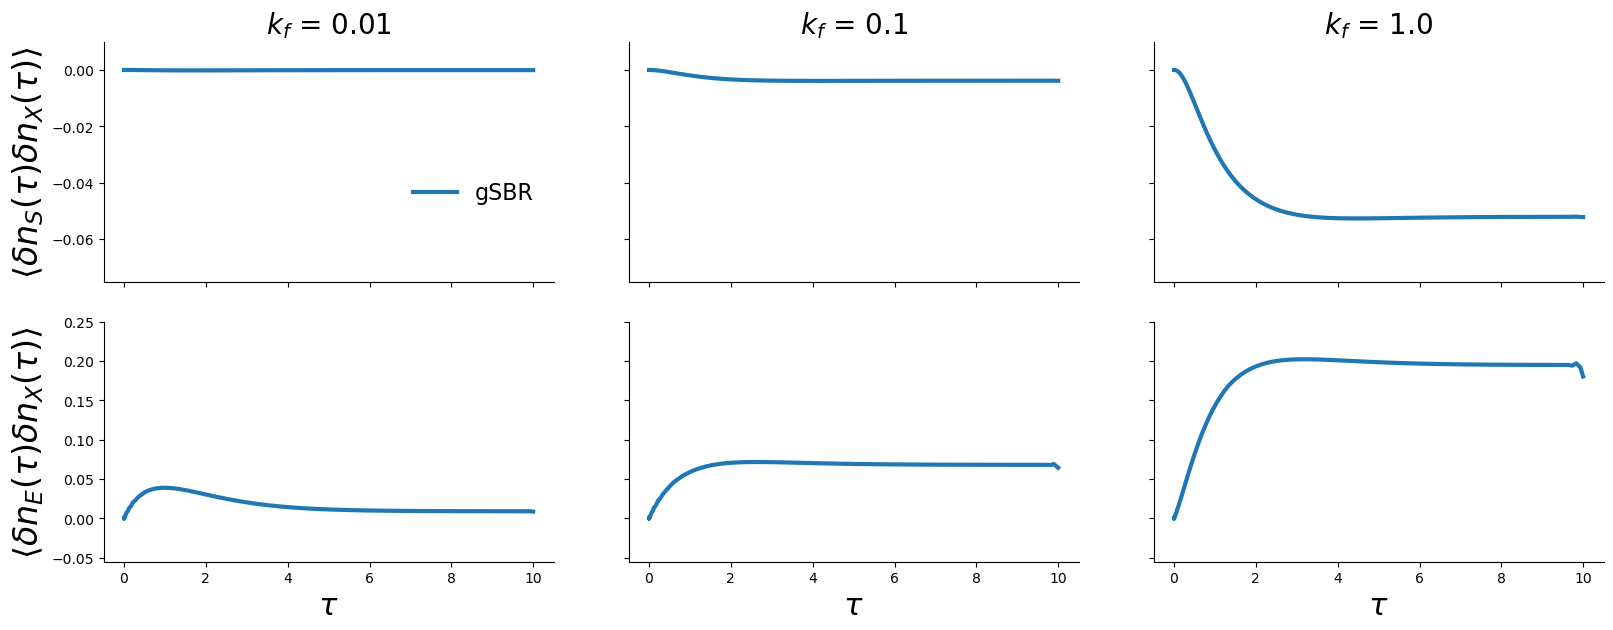

In [ ]:
fig1 = figure(figsize=(15,8))

ax_3 = fig1.add_axes([0.,0, 0.3, 0.3])
ax_4 = fig1.add_axes([0.35,0, 0.3, 0.3])

ax_1 = fig1.add_axes([0.,0.35, 0.3, 0.3])
ax_2 = fig1.add_axes([0.35,0.35, 0.3, 0.3])

ax_5 = fig1.add_axes([0.7,0.35, 0.3, 0.3])

ax_6 = fig1.add_axes([0.7,0., 0.3, 0.3])

# ax_11 = fig1.add_axes([0.,0.7, 0.3, 0.3])
# ax_22 = fig1.add_axes([0.35,0.7, 0.3, 0.3])

# ax_55 = fig1.add_axes([0.7,0.7, 0.3, 0.3])

axes = [ax_1, ax_2, ax_5, ax_3, ax_4, ax_6]#, ax_11, ax_22, ax_55]
sat = [0, 3, 6] .+ 1
skip = 1
cOL = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for i in 1:length(sat)
    
    axes[i].plot(SOL[sat[i]].t[1:skip:end], diag(VAR[sat[i]].N[1,4,1:skip:end,1:skip:end]), linestyle="-", c=cOL[1], alpha=1., linewidth=3)

    axes[i].spines["right"].set_visible(false)
    axes[i].spines["top"].set_visible(false)
    axes[i].set_ylim((-0.075, 0.01))
    axes[i].set(xticklabels=[])
    if i != 1
        axes[i].set(yticklabels=[])
    end
    axes[i].set_title("\$k_f\$ = " * string(round(alpha_range[sat[i]], digits=2)), fontsize=20)
end

axes[1].set_ylabel(L"\langle \delta n_S(\tau)\delta n_X(\tau) \rangle", fontsize=24)

for i in 1:length(sat)
    axes[i+3].plot(SOL[sat[i]].t[1:skip:end], diag(VAR[sat[i]].N[2,4,1:skip:end,1:skip:end]), linestyle="-", c=cOL[1], alpha=1., linewidth=3)

    axes[i+3].spines["right"].set_visible(false)
    axes[i+3].spines["top"].set_visible(false)
    axes[i+3].set_xlabel(L"\tau", fontsize=22)
    axes[i+3].set_ylim((-0.055, 0.25))
    if i != 1
        axes[i+3].set(yticklabels=[])
    end
end

axes[4].set_ylabel(L"\langle \delta n_{E}(\tau)\delta n_X(\tau) \rangle", fontsize=24)

ax_1.legend(["gSBR"], bbox_to_anchor=(1., 0.5), loc=1, frameon=false, fontsize=16, ncol=1)

gcf()


In [35]:
close("all")

### Plotting the two-time correlator XX $\langle \delta n_X(\tau) \delta n_X(\tau^\prime) \rangle$ :

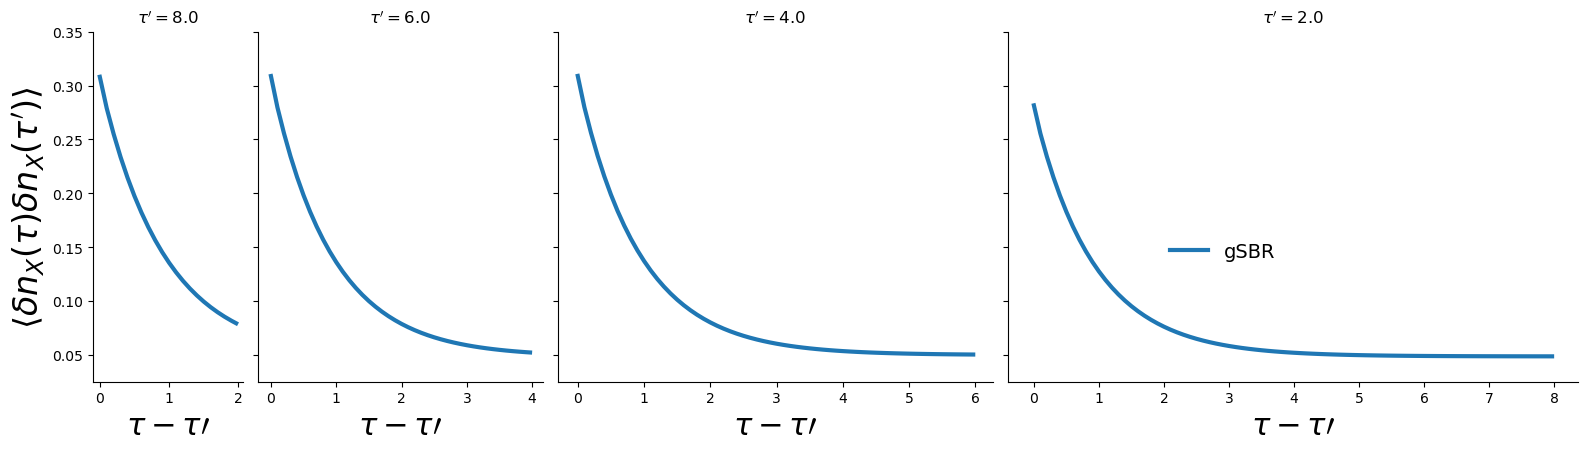

In [63]:
sat = 7

time_grid_gSBR = SOL[sat].t
#plotting_tau =  [0.75, 1.5, 2.25, 3.0]
plotting_tau =  [2., 4., 6., 8.]

function find_closed_timegrid_indices(timegrid, times)
    return [findmin(abs.(timegrid .- X))[2] for X in times]
end

tau_SBR = find_closed_timegrid_indices(time_grid_gSBR, plotting_tau)

fig = figure(figsize=(15, 3.5))
ax1 = fig.add_axes([0, 0., 0.1, 1])
ax2 = fig.add_axes([0.11, 0., 0.19, 1])
ax3 = fig.add_axes([0.31, 0., 0.29, 1])
ax4 = fig.add_axes([0.61, 0., 0.38, 1])

axis = [ax4, ax3, ax2, ax1]

for j in 1:length(tau_SBR)

    axis[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]], VAR[sat].N[4, 4, tau_SBR[j]:end, tau_SBR[j]], "-", alpha=1.,linewidth=3)
    
    axis[j].set_title(L"\tau^\prime = " * string(plotting_tau[j]))
    axis[j].spines["right"].set_visible(false)
    axis[j].spines["top"].set_visible(false)
    axis[j].set_xlabel(L"\tau-\tau\prime", fontsize=22)
    axis[j].set_ylim((0.025, 0.35))
end

ax1.set_ylabel(L"\langle \delta n_X(\tau) \delta n_X(\tau^\prime) \rangle ", fontsize=24)
ax2.set(yticklabels=[])
ax3.set(yticklabels=[])
ax4.set(yticklabels=[])

ax4.legend(["gSBR"], bbox_to_anchor=(0.5, 0.45), loc=0, frameon=false, fontsize=14)

gcf()

In [67]:
close("all")

### Plotting the response: $R_{XX}(\tau,\tau')$:

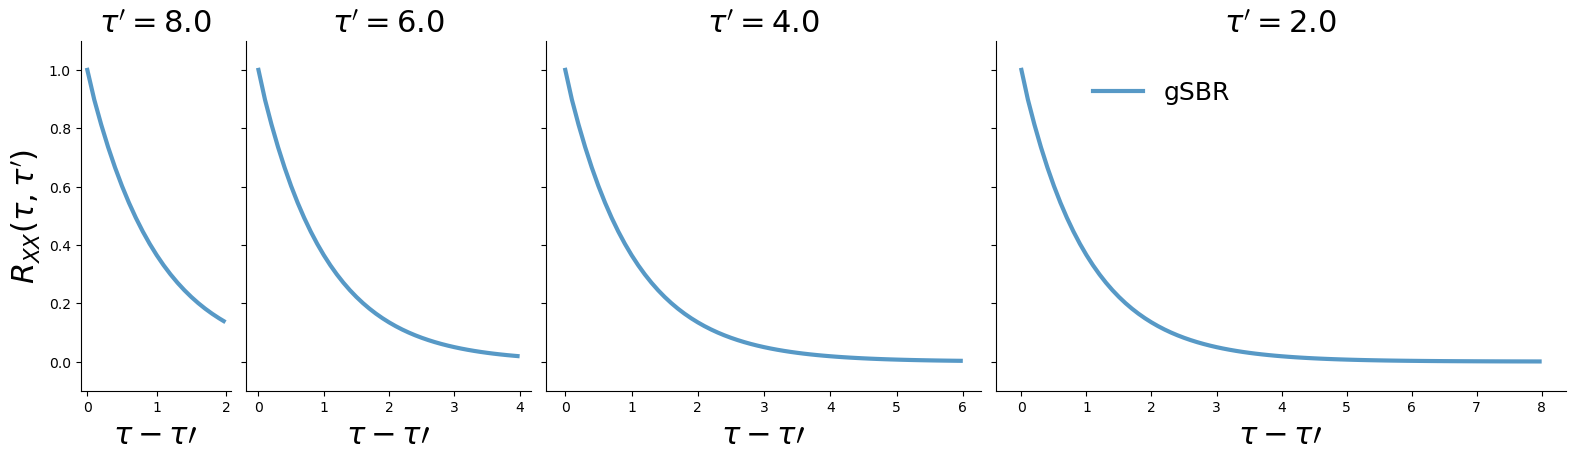

In [ ]:
sat = 7

#time_grid_all = EMRE[sat].timeGrid
time_grid_gSBR = SOL[sat].t
plotting_tau =  [2., 4., 6., 8.]

#tau = find_closed_timegrid_indices(time_grid_all, plotting_tau)
tau_SBR = find_closed_timegrid_indices(time_grid_gSBR, plotting_tau)

fig = figure(figsize=(15, 3.5))
ax1 = fig.add_axes([0, 0., 0.1, 1])
ax2 = fig.add_axes([0.11, 0., 0.19, 1])
ax3 = fig.add_axes([0.31, 0., 0.29, 1])
ax4 = fig.add_axes([0.61, 0., 0.38, 1])

axis = [ax4, ax3, ax2, ax1]

for j in 1:length(plotting_tau)

    axis[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]],(VAR[sat].R[4, 4, tau_SBR[j]:end, tau_SBR[j]]), "-", alpha=0.75,linewidth=3)
    
    axis[j].set_title(L"\tau^\prime = " * string(plotting_tau[j]), fontsize=22)
    axis[j].spines["right"].set_visible(false)
    axis[j].spines["top"].set_visible(false)
    axis[j].set_xlabel(L"\tau-\tau\prime", fontsize=22)
    axis[j].set_ylim((-0.1, 1.1))
end

ax1.set_ylabel(L"R_{XX}(\tau,\tau^\prime)", fontsize=22)
ax2.set(yticklabels=[])
ax3.set(yticklabels=[])
ax4.set(yticklabels=[])

ax4.legend(["gSBR"], bbox_to_anchor=(0.45, 0.95), loc=0, frameon=false, fontsize=18)

gcf()

## Plotting cross-responses!

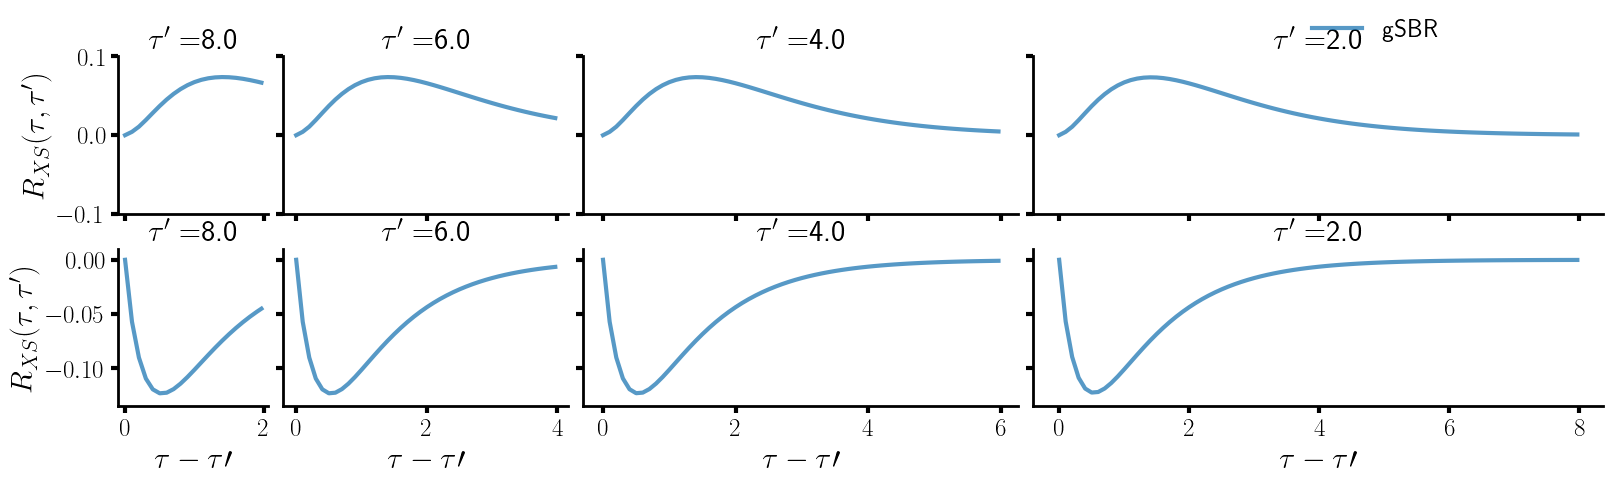

In [30]:
sat = 7

#time_grid_all = EMRE[sat].timeGrid
time_grid_gSBR = SOL[sat].t
plotting_tau =  [2., 4., 6., 8.]

function find_closed_timegrid_indices(timegrid, times)
    return [findmin(abs.(timegrid .- X))[2] for X in times]
end

#tau = find_closed_timegrid_indices(time_grid_all, plotting_tau)
tau_SBR = find_closed_timegrid_indices(time_grid_gSBR, plotting_tau)

fig = figure(figsize=(15, 3.5))
ax1 = fig.add_axes([0, 0.55, 0.1, 0.45])
ax2 = fig.add_axes([0.11, 0.55, 0.19, 0.45])
ax3 = fig.add_axes([0.31, 0.55, 0.29, 0.45])
ax4 = fig.add_axes([0.61, 0.55, 0.38, 0.45])

ax11 = fig.add_axes([0, 0., 0.1, 0.45])
ax22 = fig.add_axes([0.11, 0., 0.19, 0.45])
ax33 = fig.add_axes([0.31, 0., 0.29, 0.45])
ax44 = fig.add_axes([0.61, 0., 0.38, 0.45])

axis = [ax4, ax3, ax2, ax1]

axis2 = [ax44, ax33, ax22, ax11]

for j in 1:length(plotting_tau)

    axis[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]],(VAR[sat].R[4,1, tau_SBR[j]:end, tau_SBR[j]]), "-", alpha=0.75,linewidth=3)
    
    axis[j].set_title(L"\tau^\prime = " * string(plotting_tau[j]), fontsize=22)
    axis[j].spines["right"].set_visible(false)
    axis[j].spines["top"].set_visible(false)
    #axis[j].set_xlabel(L"\tau-\tau\prime", fontsize=22)
    axis[j].set_ylim((-0.1, 0.1))
end

for j in 1:length(plotting_tau)

    axis2[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]],(VAR[sat].R[2,1, tau_SBR[j]:end, tau_SBR[j]]), "-", alpha=0.75,linewidth=3)
    
    axis2[j].set_title(L"\tau^\prime = " * string(plotting_tau[j]), fontsize=22)
    axis2[j].spines["right"].set_visible(false)
    axis2[j].spines["top"].set_visible(false)
    axis2[j].set_xlabel(L"\tau-\tau\prime", fontsize=22)
    axis2[j].set_ylim((-0.135, 0.01))
end

ax1.set_ylabel(L"R_{XS}(\tau,\tau^\prime)", fontsize=22)
ax2.set(yticklabels=[])
ax3.set(yticklabels=[])
ax4.set(yticklabels=[])
ax1.set(xticklabels=[])
ax2.set(xticklabels=[])
ax3.set(xticklabels=[])
ax4.set(xticklabels=[])

ax4.legend(["gSBR"], bbox_to_anchor=(0.45, 0.95), loc=0, frameon=false, fontsize=18)

ax11.set_ylabel(L"R_{XS}(\tau,\tau^\prime)", fontsize=22)
ax22.set(yticklabels=[])
ax33.set(yticklabels=[])
ax44.set(yticklabels=[])

#ax4.legend(["gSBR"], bbox_to_anchor=(0.45, 0.95), loc=0, frameon=false, fontsize=18)

gcf()


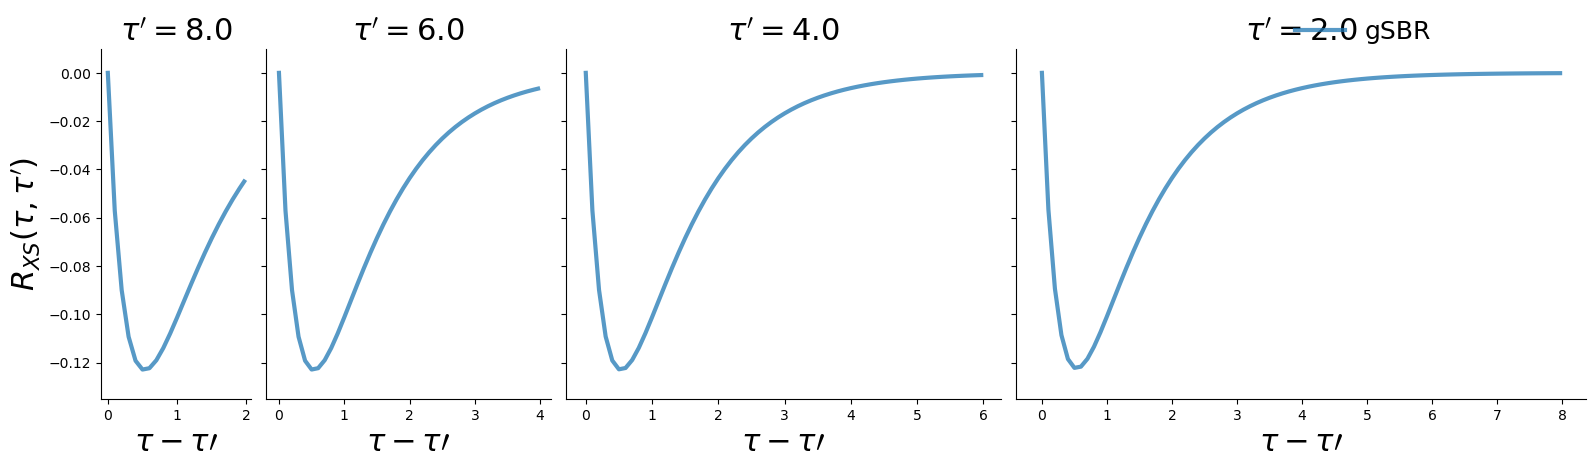

In [13]:
sat = 7

#time_grid_all = EMRE[sat].timeGrid
time_grid_gSBR = SOL[sat].t
plotting_tau =  [2., 4., 6., 8.]

function find_closed_timegrid_indices(timegrid, times)
    return [findmin(abs.(timegrid .- X))[2] for X in times]
end

#tau = find_closed_timegrid_indices(time_grid_all, plotting_tau)
tau_SBR = find_closed_timegrid_indices(time_grid_gSBR, plotting_tau)

fig = figure(figsize=(15, 3.5))
ax1 = fig.add_axes([0, 0., 0.1, 1])
ax2 = fig.add_axes([0.11, 0., 0.19, 1])
ax3 = fig.add_axes([0.31, 0., 0.29, 1])
ax4 = fig.add_axes([0.61, 0., 0.38, 1])

axis = [ax4, ax3, ax2, ax1]

for j in 1:length(plotting_tau)

    axis[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]],(VAR[sat].R[2,1, tau_SBR[j]:end, tau_SBR[j]]), "-", alpha=0.75,linewidth=3)
    
    axis[j].set_title(L"\tau^\prime = " * string(plotting_tau[j]), fontsize=22)
    axis[j].spines["right"].set_visible(false)
    axis[j].spines["top"].set_visible(false)
    axis[j].set_xlabel(L"\tau-\tau\prime", fontsize=22)
    axis[j].set_ylim((-0.135, 0.01))
end

ax1.set_ylabel(L"R_{XS}(\tau,\tau^\prime)", fontsize=22)
ax2.set(yticklabels=[])
ax3.set(yticklabels=[])
ax4.set(yticklabels=[])

ax4.legend(["gSBR"], bbox_to_anchor=(0.45, 0.95), loc=0, frameon=false, fontsize=18)

gcf()


In [4]:
close("all")

MethodError: MethodError: no method matching close(::String)
The function `close` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  close(!Matched::Base.Libc.FILE)
   @ Base libc.jl:131
  close(!Matched::Base64.Base64EncodePipe)
   @ Base64 ~/.julia/juliaup/julia-1.11.2+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Base64/src/encode.jl:110
  close(!Matched::LibGit2.GitDescribeResult)
   @ LibGit2 ~/.julia/juliaup/julia-1.11.2+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LibGit2/src/types.jl:1070
  ...


## Compare with other dynamical methods:

Note that now we use other libraries and code written in python for the implementation of other dynamical methods. They are NOT originally intended to be a part of the package.

In [6]:
using PyCall
using Pkg
using Conda

py"""
import sys
sys.path.append("../extras/other_dynamics")
"""

@pyimport cheMASTER
@pyimport emre

@pyimport numpy as np
@pyimport importlib

In [7]:
# Setting up the reactions and the parameters:

num_species     = 4 #Number of species in the reaction system
num_interaction = 3 # Number of interating reactions in the Hamiltonian
num_reactions   = 2*num_species + num_interaction # This counts the total number of possible reactions in the system.
                                        # We have 2N creation and destruction reactions and the rest interaction reactions

# We take the order to be G,G*,P

# Rate constants for the reaction system: [k1 is Creation and k2 is Destruction]
k1 = np.array([1.,0.,0.,0.]) #len must be equal to num_species
k2 = np.array([1.,0.,0,1.]) #len must be equal to num_species

k3 = np.array([1.,0.1,1.]) 
s_i,r_i = np.zeros([num_interaction,num_species]),np.zeros([num_interaction,num_species])
rxn_par = [k1,k2,k3]

s_i[1,:] = [0,0,1,0] 
r_i[1,:] = [1,1,0,0]
s_i[2,:] = [1,1,0,0]
r_i[2,:] = [0,0,1,0]
s_i[3,:] = [0,1,0,1]
r_i[3,:] = [0,0,1,0]

#The initial concentration of the species. 
#Note: for Gillespie we start each trajectory from a Poisonian random variable with mean as the initial conc.below:
initial_values = np.array([1.,0.9,0.1,0.1])

dt = 0.025
tf = 10.

10.0

In [4]:
#Run some Gillespie simulations
num_gill = 100
gill     = []

for i in range(1,num_gill)
    push!(gill,cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    cheMASTER.gillespie_avg(gill[i],1,initial_values,0,tf,dt,10000)
    print(gill[i])
end

PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x32823b320>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3287fb980>

100%|##########| 1/1 [00:00<00:00, 799.22it/s]


PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3287fbaa0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x33500fa40>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x33769d010>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3658252b0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3280ba780>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x33508acc0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x365a079b0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x366541a90>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x335922f90>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3667a2450>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x336cb03e0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x336cb1190>PyObject <cheMASTER.chemical_system.chem

100%|##########| 1/1 [00:00<00:00, 1599.66it/s]


In [17]:
#Plot settings!

cmap = plt.get_cmap("tab10")
col = [cmap(i) for i in np.linspace(0, 1, num_gill-75)]

original_rcParams = copy(plt.rcParams)
rcParams = PyDict(matplotlib["rcParams"])

plot_params = Dict("font.size" => 70, "font.family" => "sans-serif", "text.usetex" => true, "font.weight" => 900, "axes.linewidth" => 2, "xtick.major.width" => 3, "xtick.major.size" => 5, "xtick.minor.width" => 2, "xtick.minor.size" => 3, "ytick.major.width" => 3, "ytick.major.size" => 5, "ytick.minor.width" => 2, "ytick.minor.size" => 3, "axes.labelsize" => 18, "xtick.labelsize" => 18, "ytick.labelsize" => 18)
plot_params2 = (Dict(
    "text.usetex" => false,
    "xtick.labelsize" => 20,
    "ytick.labelsize" => 20,
    "xtick.major.width" => 3,
    "ytick.major.width" => 3,
    "xtick.major.size" => 10,
    "ytick.major.size" => 10,
    "xtick.direction" => "in",
    "ytick.direction" => "in",
    "font.size" => 30,
    "figure.autolayout" => true,
    "figure.figsize" => (10, 5),
    "axes.titlesize" => 20,
    "axes.labelsize" => 20,
    "lines.linewidth" => 3,
    "lines.markersize" => 3,
    "legend.fontsize" => 13,
    "mathtext.fontset" => "stix",
    "axes.linewidth" => 3
))

merge!(rcParams,plot_params)
merge!(rcParams,plot_params2)

PyDict{PyAny, PyAny, true} with 318 entries:
  "webagg.port"            => 8988
  "webagg.address"         => "127.0.0.1"
  "webagg.port_retries"    => 50
  "webagg.open_in_browser" => true
  "backend_fallback"       => false
  "interactive"            => false
  "figure.hooks"           => Any[]
  "toolbar"                => "toolbar2"
  "timezone"               => "UTC"
  "lines.linewidth"        => 3.0
  "lines.linestyle"        => "-"
  "lines.color"            => "C0"
  "lines.marker"           => "None"
  "lines.markerfacecolor"  => "auto"
  "lines.markeredgecolor"  => "auto"
  "lines.markeredgewidth"  => 1.0
  "lines.markersize"       => 3.0
  "lines.dash_joinstyle"   => "round"
  "lines.dash_capstyle"    => "butt"
  ⋮                        => ⋮

In [18]:
#import matplotlib


fig1  = plt.figure(figsize=(15,8))

ax_1 = fig1.add_axes([0.,0.525, 0.3, 0.4])
ax_2 = fig1.add_axes([0.35,0.525, 0.3, 0.4])
ax_3 = fig1.add_axes([0.7,0.525, 0.3, 0.4])
ax_0 = 0
axes = [ax_1,ax_2,ax_0,ax_3]
sat  = [0,3,6]
skip = 2
cOL = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for i in range(1,num_species)
    if i != 3
        for j in range(1,num_gill-75)
            if all(gill[j].y[1,:] .- 3 .< 0.)
                #axes[i].plot(gill[j].timeGrid, gill[j].y[i,:], "--", c=colors[j], alpha=1., linewidth=3)
                axes[i].plot(gill[j].timeGrid[1:skip:end], gill[j].y[i,1:skip:end], "--", c=col[j], alpha=1., linewidth=3)
            end
        end
        axes[i].spines["right"].set_visible(false)
        axes[i].spines["top"].set_visible(false)
        #axes[i].set_title("Enzyme Sat = "+str(np.round(enzyme_sat[sat[i]],2)))
        #axes[i].set_title("$k_u$ = "+str(np.round(alpha_range[sat[i]],2)),fontsize=20)
        axes[i].set_xlabel(L"${\tau}$",fontsize=22)
    end
end
axes[1].set_ylabel(L"$n_S$",fontsize=28)
axes[2].set_ylabel(L"$n_{E}$",fontsize=28)
axes[4].set_ylabel(L"$n_X$",fontsize=28)
plt.savefig("../plots/enzyme1/enzyme_gillespie_new.png",bbox_inches="tight")
plt.close()

sys:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


## Run Master equation and EMRE solutions:

In [8]:
Master = []

for i in range(1,length(alpha_range))

    rxn_par[3][1] = alpha_range[i]
    
    push!(Master,cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    print("ex ",i,"\n")
    
    cheMASTER.initialize_dynamics(Master[i],initial_values,0,tf,dt)
    print("ex ",i,"\n")
    #cheMASTER.runDynamics(Master[i],max_num=[5,5,4,4],method = "Eigenvalue",crossCorrelator_tau=false,variance=true)
    
    cheMASTER.runDynamics(Master[i],max_num=[6,6,5,5],method = "Eigenvalue",crossCorrelator_tau="connected",variance=true)
    #Why is this executing sooo slowly?
    print(i,"\n")
    
end

ex 1

100%|##########| 400/400 [16:15<00:00,  2.44s/it]



ex 1
1


100%|##########| 400/400 [16:43<00:00,  2.51s/it]


ex 2
ex 2
2


100%|##########| 400/400 [26:57<00:00,  4.04s/it]   


ex 3
ex 3
3


100%|##########| 400/400 [2:12:20<00:00, 19.85s/it]   


ex 4
ex 4
4


100%|##########| 400/400 [16:25<00:00,  2.46s/it]


ex 5
ex 5
5


100%|##########| 400/400 [15:50<00:00,  2.38s/it]


ex 6
ex 6
6


100%|##########| 400/400 [15:44<00:00,  2.36s/it]


ex 7
ex 7
7


100%|##########| 400/400 [15:55<00:00,  2.39s/it]


ex 8
ex 8
8


100%|##########| 400/400 [15:52<00:00,  2.38s/it]


ex 9
ex 9
9


100%|##########| 400/400 [15:47<00:00,  2.37s/it]


ex 10
ex 10
10


In [9]:
println("Done")

Done


In [10]:
open("../data/enzyme1/master.jls", "w") do f
    serialize(f, Master)
end

In [20]:
EMRE   = []

for i in range(1,length(alpha_range))
    
    rxn_par[3][1] = alpha_range[i]
    push!(EMRE,emre.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    emre.initialize_dynamics(EMRE[i],initial_values,0,tf,dt,alpha=1.,volume=1.,measureResponse=true,crossCorrelator_tau=true)
    emre.runDynamics(EMRE[i])

    println(i)
end

1


399it [00:00, 811.67it/s]                          


2


399it [00:00, 783.78it/s]                          


3


399it [00:00, 792.95it/s]                          


4


399it [00:00, 818.45it/s]                          


5


399it [00:00, 804.10it/s]                          


6


399it [00:00, 799.85it/s]                          


7


399it [00:00, 811.45it/s]                          


8


399it [00:00, 810.52it/s]                          


9


399it [00:00, 812.43it/s]                          


10


399it [00:00, 815.00it/s]                          


In [10]:
open("../data/enzyme1/emre.jls", "w") do f
    serialize(f, EMRE)
end

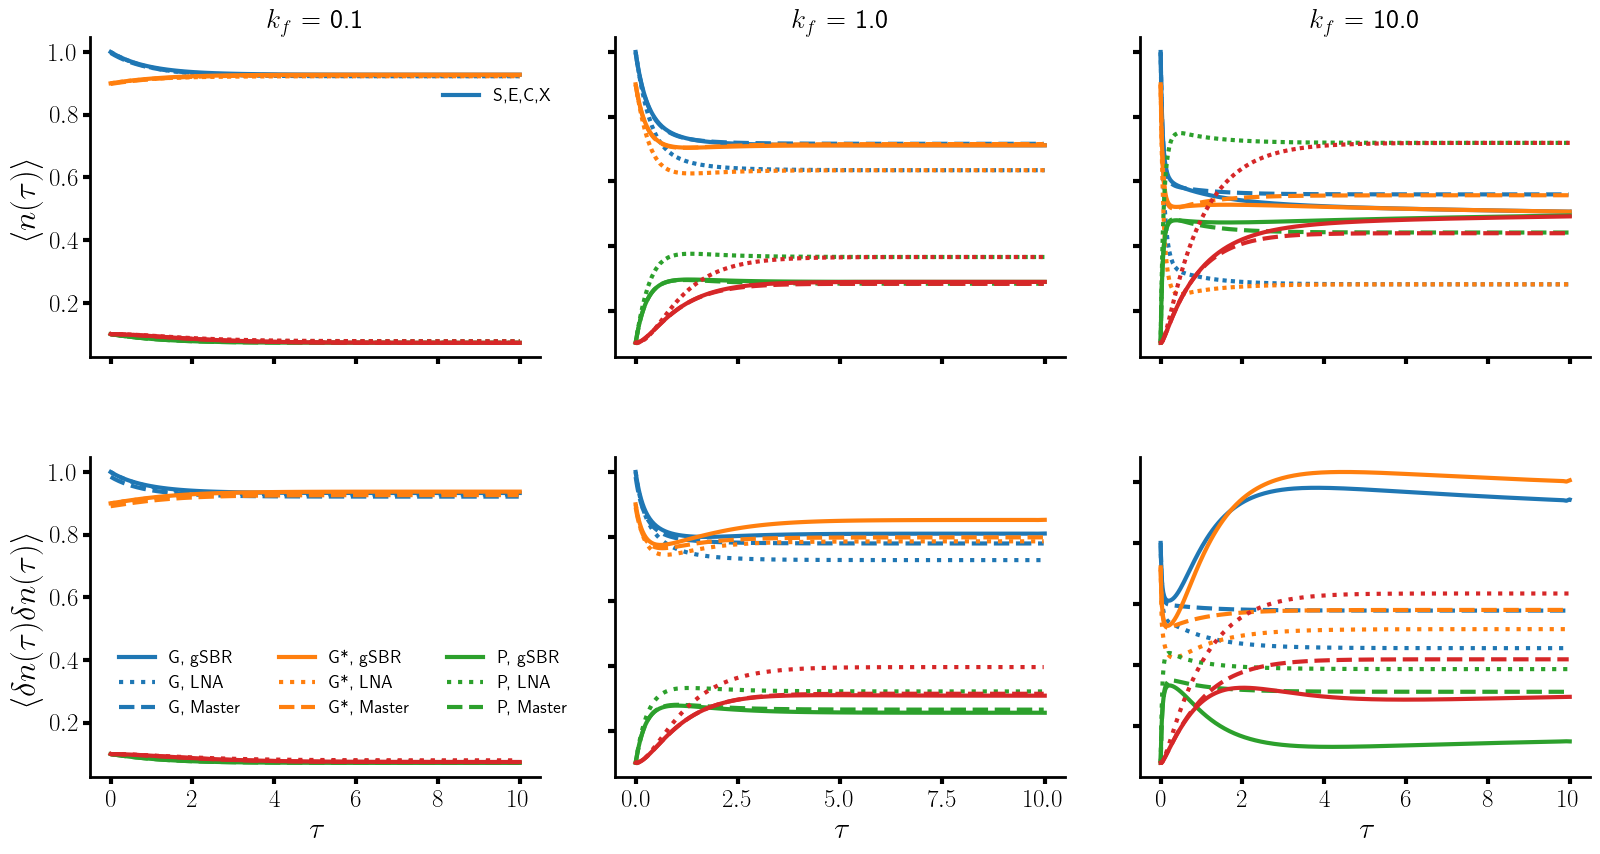

In [21]:
plot_params3 = (Dict(
    "font.size" => 20,
    "font.family" => "sans-serif",
    "text.usetex" => true,
    "font.weight" => 900,
    "axes.linewidth" => 2,
    "xtick.major.width" => 3,
    "xtick.major.size" => 5,
    "xtick.minor.width" => 2,
    "xtick.minor.size" => 3,
    "ytick.major.width" => 3,
    "ytick.major.size" => 5,
    "ytick.minor.width" => 2,
    "ytick.minor.size" => 3,
    "axes.labelsize" => 18,
    "xtick.labelsize" => 18,
    "ytick.labelsize" => 18,
    "font.size" => 20,
))

rcParams = PyDict(matplotlib["rcParams"])
merge!(rcParams, plot_params3)

fig1 = plt.figure(figsize=(15, 8))

ax_3 = fig1.add_axes([0., 0, 0.3, 0.4])
ax_4 = fig1.add_axes([0.35, 0, 0.3, 0.4])

ax_1 = fig1.add_axes([0., 0.525, 0.3, 0.4])
ax_2 = fig1.add_axes([0.35, 0.525, 0.3, 0.4])

ax_5 = fig1.add_axes([0.7, 0.525, 0.3, 0.4])

ax_6 = fig1.add_axes([0.7, 0., 0.3, 0.4])

axes = [ax_1, ax_2, ax_5, ax_3, ax_4, ax_6]
#sat = [0, 3, 6] .+ 1
sat = [3, 6, 9] .+ 1
#sat = 1
skip = 1
cOL = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for i in 1:length(sat)
    for j in 1:num_species
        #axes[i].plot(QUAD2SBR[sat[i]].timeGrid[1:skip:end], QUAD2SBR[sat[i]].y[j, 1:skip:end]', linestyle="-", c=cOL[j], alpha=1., linewidth=3)
        axes[i].plot(SOL[sat[i]].t, VAR[sat[i]].μ[j, :], linestyle="-", c=cOL[j], alpha=1., linewidth=3)

        #axes[i].plot(MAK[sat[i]].timeGrid[1:skip:end], MAK[sat[i]].y[j, 1:skip:end]', linestyle=(0, (1, 1)), c=cOL[j], alpha=1., linewidth=3)
        
        axes[i].plot(SOL_mak[sat[i]].t, VAR_mak[sat[i]].μ[j, :], linestyle=(0, (1, 1)), c=cOL[j], alpha=1., linewidth=3)
        
        axes[i].plot(Master[sat[i]].timeGrid[1:skip:end], Master[sat[i]].y[j, 1:skip:end]', "--", c=cOL[j], alpha=1., linewidth=3)
    end
    axes[i].spines["right"].set_visible(false)
    axes[i].spines["top"].set_visible(false)
    axes[i].set_title("\$k_f\$ = " * string(round(alpha_range[sat[i]], digits=2)), fontsize=20)
    #axes[i].set_yscale("log")
    #axes[i].set_xscale("log")
    #axes[i].set_ylim((0.002, 2.50))
    axes[i].set(xticklabels=[])
    if i != 1
        axes[i].set(yticklabels=[])
    end
end
axes[1].set_ylabel(L"$ \langle n(\tau) \rangle $", fontsize=24)

for i in 1:length(sat)
    for j in 1:num_species
        #axes[i + 3].plot(QUAD2SBR[sat[i]].timeGrid[1:skip:end], (QUAD2SBR[sat[i]].y[j, 1:skip:end] + diag(QUAD2SBR[sat[i]].corr[j, j, 1:skip:end, 1:skip:end]))', linestyle="-", c=cOL[j], alpha=1., linewidth=3)
        
        axes[i + 3].plot(SOL[sat[i]].t, diag(VAR[sat[i]].N[j, j, :, :]), linestyle="-", c=cOL[j], alpha=1., linewidth=3)
        
        #axes[i + 3].plot(SOL[sat[i]].t, (VAR[sat[i]].μ[j,:]), linestyle="-", c=cOL[j], alpha=1., linewidth=3)
        axes[i + 3].plot(EMRE[sat[i]].timeGrid[1:skip:end], EMRE[sat[i]].lna_var[j, j, 1:skip:end]', linestyle="dotted", c=cOL[j], alpha=1., linewidth=3)
        axes[i + 3].plot(Master[sat[i]].timeGrid[1:skip:end], Master[sat[i]].variance[j, 1:skip:end]', "--", c=cOL[j], alpha=1., linewidth=3)
    end
    axes[i + 3].spines["right"].set_visible(false)
    axes[i + 3].spines["top"].set_visible(false)
    axes[i + 3].set_xlabel(L"$ \tau $", fontsize=22)
    #axes[i + 3].set_yscale("log")
    #axes[i + 3].set_xscale("log")
    #axes[i + 3].set_ylim((0.002, 5.))
    if i != 1
        axes[i + 3].set(yticklabels=[])
    end
end
axes[4].set_ylabel(L"$\langle \delta n(\tau)\delta n(\tau) \rangle $", fontsize=24)

axes[1].legend(["S,E,C,X"], bbox_to_anchor=(1.06, 0.89), loc=1, frameon=false, fontsize=13, ncol=3)
#axes[1].legend(["G, gSBR", "G, MAK", "G, Master", "G*, gSBR", "G*, MAK", "G*, Master", "P, gSBR", "P, MAK", "P, Master"], bbox_to_anchor=(1.06, 0.89), loc=1, frameon=false, fontsize=13, ncol=3)
axes[4].legend(["G, gSBR","G, LNA","G, Master","G*, gSBR","G*, LNA","G*, Master","P, gSBR","P, LNA","P, Master"],bbox_to_anchor=(1.1, 0.45), loc=1, frameon=false, fontsize=13,ncol=3)

gcf()

#plt.savefig("../plots/gene/gene_means_variance.png", bbox_inches="tight")
#plt.close()


In [51]:
function find_closed_timegrid_indices(timegrid, times)
    return [findmin(abs.(timegrid .- X))[2] for X in times]
end

find_closed_timegrid_indices (generic function with 1 method)

In [33]:
sat = 6+1

time_grid_all = EMRE[sat].timeGrid
time_grid_gSBR = SOL[sat].t
plotting_tau =  [0.75, 1.5, 2.25, 3.0]

tau = find_closed_timegrid_indices(time_grid_all, plotting_tau)
tau_SBR = find_closed_timegrid_indices(time_grid_gSBR, plotting_tau)

fig = figure(figsize=(15, 3.5))
ax1 = fig.add_axes([0, 0., 0.1, 1])
ax2 = fig.add_axes([0.11, 0., 0.19, 1])
ax3 = fig.add_axes([0.31, 0., 0.29, 1])
ax4 = fig.add_axes([0.61, 0., 0.38, 1])

axis = [ax4, ax3, ax2, ax1]

for j in 1:length(tau)
    
    #[TODO] Change this!

    axis[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]], VAR[sat].N[4, 4, tau_SBR[j]:end, tau_SBR[j]] , "-", alpha=0.75,linewidth=3)
    
    #axis[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]], VAR[sat].N[3, 3, tau_SBR[j]:end, tau_SBR[j]], "-", alpha=0.75)

    axis[j].plot(time_grid_all[1:end-tau[j]], EMRE[sat].corr[4, 4, tau[j]+1:end, tau[j]], linestyle="dashdot", alpha=0.75,linewidth=3)

    axis[j].plot(Master[sat].timeGrid[1:end-tau[j]], Master[sat].correlator_tau[4, 4, 1:end-tau[j], tau[j]], "--", alpha=0.75, color="gray",linewidth=3)

    axis[j].set_title(L"\tau^\prime = " * string(plotting_tau[j]))
    axis[j].spines["right"].set_visible(false)
    axis[j].spines["top"].set_visible(false)
    axis[j].set_xlabel(L"\tau-\tau\prime", fontsize=22)
    axis[j].set_ylim((-0.1, 2))
end

ax1.set_ylabel(L"\langle \delta n_P(\tau) \delta n_P(\tau^\prime) \rangle ", fontsize=24)
ax2.set(yticklabels=[])
ax3.set(yticklabels=[])
ax4.set(yticklabels=[])

ax4.legend(["gSBR", "LNA", "Master"], bbox_to_anchor=(0.5, 0.45), loc=0, frameon=false, fontsize=14)

plt.savefig("../plots/enzyme1/enzyme_num_corr_X.png", bbox_inches="tight")
plt.close()

In [27]:
fig1 = figure(figsize=(15,8))

ax_3 = fig1.add_axes([0.,0, 0.3, 0.3])
ax_4 = fig1.add_axes([0.35,0, 0.3, 0.3])

ax_1 = fig1.add_axes([0.,0.35, 0.3, 0.3])
ax_2 = fig1.add_axes([0.35,0.35, 0.3, 0.3])

ax_5 = fig1.add_axes([0.7,0.35, 0.3, 0.3])

ax_6 = fig1.add_axes([0.7,0., 0.3, 0.3])

# ax_11 = fig1.add_axes([0.,0.7, 0.3, 0.3])
# ax_22 = fig1.add_axes([0.35,0.7, 0.3, 0.3])

# ax_55 = fig1.add_axes([0.7,0.7, 0.3, 0.3])

axes = [ax_1, ax_2, ax_5, ax_3, ax_4, ax_6]#, ax_11, ax_22, ax_55]
sat = [0, 3, 6] .+ 1
skip = 1
cOL = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for i in 1:length(sat)
    
    axes[i].plot(SOL[sat[i]].t[1:skip:end], diag(VAR[sat[i]].N[1,4,1:skip:end,1:skip:end]), linestyle="-", c=cOL[1], alpha=1., linewidth=3)
    axes[i].plot(EMRE[sat[i]].timeGrid[1:skip:end], EMRE[sat[i]].lna_var[1,4,1:skip:end], linestyle="dashdot", c=cOL[2], alpha=1., linewidth=3)
    axes[i].plot(Master[sat[i]].timeGrid[1:end], Master[sat[i]].correlator_tau[1,4,1,1:end], "--", c="gray", alpha=1., linewidth=3)

    axes[i].spines["right"].set_visible(false)
    axes[i].spines["top"].set_visible(false)
    axes[i].set_ylim((-0.075, 0.01))
    axes[i].set(xticklabels=[])
    if i != 1
        axes[i].set(yticklabels=[])
    end
    axes[i].set_title("\$k_f\$ = " * string(round(alpha_range[sat[i]], digits=2)), fontsize=20)
end

axes[1].set_ylabel(L"\langle \delta n_S(\tau)\delta n_X(\tau) \rangle", fontsize=24)

for i in 1:length(sat)
    axes[i+3].plot(SOL[sat[i]].t[1:skip:end], diag(VAR[sat[i]].N[2,4,1:skip:end,1:skip:end]), linestyle="-", c=cOL[1], alpha=1., linewidth=3)
    axes[i+3].plot(EMRE[sat[i]].timeGrid[1:skip:end], EMRE[sat[i]].lna_var[2,4,1:skip:end], linestyle="dashdot", c=cOL[2], alpha=1., linewidth=3)
    axes[i+3].plot(Master[sat[i]].timeGrid[1:end], Master[sat[i]].correlator_tau[2,4,1,1:end], "--", c="gray", alpha=1., linewidth=3)

    axes[i+3].spines["right"].set_visible(false)
    axes[i+3].spines["top"].set_visible(false)
    axes[i+3].set_xlabel(L"\tau", fontsize=22)
    axes[i+3].set_ylim((-0.055, 0.25))
    if i != 1
        axes[i+3].set(yticklabels=[])
    end
end

axes[4].set_ylabel(L"\langle \delta n_{E}(\tau)\delta n_X(\tau) \rangle", fontsize=24)

ax_1.legend(["gSBR", "LNA", "Master"], bbox_to_anchor=(1., 0.75), loc=1, frameon=false, fontsize=16, ncol=1)

gcf()

plt.savefig("../plots/enzyme1/enzyme_equal_time_corr.png", bbox_inches="tight")
plt.close()


In [49]:
Master_response = []

#This is calculation intensive, be careful!

for i in range(1,length(alpha_range))
    
    rxn_par[3][3] = alpha_range[i]
    rxn_par[1]    = rxn_par[1] .+ 0.001

    push!(Master_response,cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    cheMASTER.initialize_dynamics(Master_response[i],initial_values,0,tf,0.1*dt)
    cheMASTER.runDynamics(Master_response[i],max_num=[10,10,20],method = "Euler",measureResponse="finite-cross",measureResponse_par=[1.1,1])
    
    println(i)

end
rxn_par[1] = k1

1


100%|##########| 70/70 [07:30<00:00,  6.44s/it]


2


100%|##########| 70/70 [07:30<00:00,  6.44s/it]


3


100%|##########| 70/70 [07:24<00:00,  6.35s/it]


4


100%|##########| 70/70 [07:20<00:00,  6.29s/it]


5


100%|##########| 70/70 [07:20<00:00,  6.29s/it]


6


100%|##########| 70/70 [07:26<00:00,  6.38s/it]


7


100%|##########| 70/70 [07:26<00:00,  6.37s/it]


8


100%|##########| 70/70 [07:26<00:00,  6.38s/it]


9


100%|##########| 70/70 [07:23<00:00,  6.33s/it]


10


100%|##########| 70/70 [07:23<00:00,  6.34s/it]


Base.Meta.ParseError: ParseError:
# Error @ /Users/harsh/Work/code/achedmy/examples/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y143sZmlsZQ==.jl:18:34
open("../data/gene/Master_response.jls", "w") do f
    serialize(f, Master_response)
#                                └ ── Expected `end`

In [29]:
Master_response = []

i = 6 + 1 

rxn_par[3][3] = alpha_range[i]
rxn_par[1]    = rxn_par[1] .+ 0.001

#Master_response[i] = cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i)
push!(Master_response,cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
cheMASTER.initialize_dynamics(Master_response[1],initial_values,0,tf,0.1*dt)
cheMASTER.runDynamics(Master_response[1],max_num=[6,6,5,5],method = "Euler",measureResponse="finite-cross",measureResponse_par=[1.1,1])

rxn_par[1] = k1

 29%|##9       | 1173/4000 [11:04:19<20:26:56, 26.04s/it]  

PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= /Users/harsh/.julia/packages/PyCall/1gn3u/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'BlockingIOError'>
BlockingIOError(35, 'write could not complete without blocking', 0)
  File "/Users/harsh/Work/code/achedmy/examples/../extras/other_dynamics/cheMASTER/dynamics.py", line 145, in runDynamics
  File "/Users/harsh/.julia/conda/3/aarch64/lib/python3.12/site-packages/tqdm/std.py", line 1140, in __exit__
    self.close()
  File "/Users/harsh/.julia/conda/3/aarch64/lib/python3.12/site-packages/tqdm/std.py", line 1302, in close
    self.display(pos=0)
  File "/Users/harsh/.julia/conda/3/aarch64/lib/python3.12/site-packages/tqdm/std.py", line 1495, in display
    self.sp(self.__str__() if msg is None else msg)
  File "/Users/harsh/.julia/conda/3/aarch64/lib/python3.12/site-packages/tqdm/std.py", line 459, in print_status
    fp_write('\r' + s + (' ' * max(last_len[0] - len_s, 0)))
  File "/Users/harsh/.julia/conda/3/aarch64/lib/python3.12/site-packages/tqdm/std.py", line 452, in fp_write
    fp.write(str(s))
  File "/Users/harsh/.julia/conda/3/aarch64/lib/python3.12/site-packages/tqdm/utils.py", line 196, in inner
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^


In [31]:
println("Done")

Done


In [32]:
open("../data/gene/Master_response.jls", "w") do f
    serialize(f, Master_response)
end

In [34]:
sat = 7

time_grid_all = EMRE[sat].timeGrid
time_grid_gSBR = SOL[sat].t
plotting_tau =  [2., 4., 6., 8.]

function find_closed_timegrid_indices(timegrid, times)
    return [findmin(abs.(timegrid .- X))[2] for X in times]
end

tau = find_closed_timegrid_indices(time_grid_all, plotting_tau)
tau_SBR = find_closed_timegrid_indices(time_grid_gSBR, plotting_tau)

fig = figure(figsize=(15, 3.5))
ax1 = fig.add_axes([0, 0.55, 0.1, 0.45])
ax2 = fig.add_axes([0.11, 0.55, 0.19, 0.45])
ax3 = fig.add_axes([0.31, 0.55, 0.29, 0.45])
ax4 = fig.add_axes([0.61, 0.55, 0.38, 0.45])

ax11 = fig.add_axes([0, 0., 0.1, 0.45])
ax22 = fig.add_axes([0.11, 0., 0.19, 0.45])
ax33 = fig.add_axes([0.31, 0., 0.29, 0.45])
ax44 = fig.add_axes([0.61, 0., 0.38, 0.45])

axis = [ax4, ax3, ax2, ax1]

axis2 = [ax44, ax33, ax22, ax11]

for j in 1:length(plotting_tau)

    axis[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]],(VAR[sat].R[4,1, tau_SBR[j]:end, tau_SBR[j]]), "-", alpha=0.75,linewidth=3)
    axis[j].plot(time_grid_all[1:end-tau[j]], EMRE[sat].resp[4, 1, tau[j]+1:end, tau[j]], linestyle="dashdot", alpha=0.75,linewidth=3)
    axis[j].plot(Master_response[sat].timeGrid[1:end-tau[j]], Master_response[sat].Response[4, 1, 1:end-tau[j], tau[j]], "--", alpha=0.75, color="gray",linewidth=3)
    
    axis[j].set_title(L"\tau^\prime = " * string(plotting_tau[j]), fontsize=22)
    axis[j].spines["right"].set_visible(false)
    axis[j].spines["top"].set_visible(false)
    #axis[j].set_xlabel(L"\tau-\tau\prime", fontsize=22)
    axis[j].set_ylim((-0.1, 0.1))
end

for j in 1:length(plotting_tau)

    axis2[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]],(VAR[sat].R[2,1, tau_SBR[j]:end, tau_SBR[j]]), "-", alpha=0.75,linewidth=3)
    axis[j].plot(time_grid_all[1:end-tau[j]], EMRE[sat].resp[2, 1, tau[j]+1:end, tau[j]], linestyle="dashdot", alpha=0.75,linewidth=3)
    axis[j].plot(Master_response[sat].timeGrid[1:end-tau[j]], Master_response[sat].Response[2, 1, 1:end-tau[j], tau[j]], "--", alpha=0.75, color="gray",linewidth=3)
    
    axis2[j].set_title(L"\tau^\prime = " * string(plotting_tau[j]), fontsize=22)
    axis2[j].spines["right"].set_visible(false)
    axis2[j].spines["top"].set_visible(false)
    axis2[j].set_xlabel(L"\tau-\tau\prime", fontsize=22)
    axis2[j].set_ylim((-0.135, 0.01))
end

ax1.set_ylabel(L"R_{ES}(\tau,\tau^\prime)", fontsize=22)
ax2.set(yticklabels=[])
ax3.set(yticklabels=[])
ax4.set(yticklabels=[])
ax1.set(xticklabels=[])
ax2.set(xticklabels=[])
ax3.set(xticklabels=[])
ax4.set(xticklabels=[])

ax4.legend(["gSBR", "LNA", "Master"], bbox_to_anchor=(0.45, 0.95), loc=0, frameon=false, fontsize=18)
#ax4.legend(["gSBR"], bbox_to_anchor=(0.45, 0.95), loc=0, frameon=false, fontsize=18)

ax11.set_ylabel(L"R_{XS}(\tau,\tau^\prime)", fontsize=22)
ax22.set(yticklabels=[])
ax33.set(yticklabels=[])
ax44.set(yticklabels=[])

plt.savefig("../plots/enzyme1/enzyme_reposne.png", bbox_inches="tight")
plt.close()


gcf()


BoundsError: BoundsError: attempt to access 1-element Vector{Any} at index [7]

In [ ]:
sat = 6 + 1

time_grid_all = EMRE[sat].timeGrid
time_grid_gSBR = SOL[sat].t
plotting_tau =  [2., 4., 6., 8.]

tau = find_closed_timegrid_indices(time_grid_all, plotting_tau)
tau_SBR = find_closed_timegrid_indices(time_grid_gSBR, plotting_tau)

fig = figure(figsize=(15, 3.5))
ax1 = fig.add_axes([0, 0., 0.1, 1])
ax2 = fig.add_axes([0.11, 0., 0.19, 1])
ax3 = fig.add_axes([0.31, 0., 0.29, 1])
ax4 = fig.add_axes([0.61, 0., 0.38, 1])

axis = [ax4, ax3, ax2, ax1]

for j in 1:length(plotting_tau)

    axis[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]],(VAR[sat].R[3, 3, tau_SBR[j]:end, tau_SBR[j]]), "-", alpha=0.75,linewidth=3)

    axis[j].plot(time_grid_all[1:end-tau[j]], EMRE[sat].resp[3, 3, tau[j]+1:end, tau[j]], linestyle="dashdot", alpha=0.75,linewidth=3)

    axis[j].plot(Master_response[sat].timeGrid[1:end-tau[j]], Master_response[sat].Response[3, 3, 1:end-tau[j], tau[j]], "--", alpha=0.75, color="gray",linewidth=3)
    
    #axis[j].plot(time_grid_all[1:end-tau[j]], respALL_2[2, 2, 1:end-tau[j], tau[j]], "-", alpha=1., linewidth=3)
    #axis[j].plot(time_grid_all[1:end-tau[j]], respLNA_2[2, 2, 1:end-tau[j], tau[j]], linestyle="dashdot", alpha=1., linewidth=3)
    #axis[j].plot(time_grid_all[1:end-tau[j]], respME_2[2, 2, 1:end-tau[j], tau[j]], "--", alpha=1., linewidth=3, color="gray")
    
    axis[j].set_title(L"\tau^\prime = " * string(plotting_tau[j]), fontsize=22)
    axis[j].spines["right"].set_visible(false)
    axis[j].spines["top"].set_visible(false)
    axis[j].set_xlabel(L"\tau-\tau\prime", fontsize=22)
    axis[j].set_ylim((-0.1, 1.))
end

ax1.set_ylabel(L"R_{PP}(\tau,\tau^\prime)", fontsize=22)
ax2.set(yticklabels=[])
ax3.set(yticklabels=[])
ax4.set(yticklabels=[])

ax4.legend(["gSBR", "LNA", "Master"], bbox_to_anchor=(0.45, 0.95), loc=0, frameon=false, fontsize=18)

gcf()


In [ ]:
close()

### Plotting the time averaged trajectory errors:


In [ ]:
#import Pkg; Pkg.add("Interpolations")
using Interpolations

function time_averaged_trajectory_error(sys_mean, sys_t, sys_ref_mean, sys_ref_t)
    #Interpolates the timegrid of sys_ref to sys and calculates the error

    interp_ref_mean = interpolate((sys_ref_t,), sys_ref_mean, Gridded(Linear()))

    interp_ref_mean_vals = [interp_ref_mean(sys_t[i]) for i in 1:length(sys_t) if sys_t[i] < maximum(sys_ref_t)]

    error = sum(abs, sys_mean[1:length(interp_ref_mean_vals)] ./ interp_ref_mean_vals .- 1 ) / length(sys_t)
    
    return error

end

In [ ]:
#Create the error plots here!